## Korona-Science: Projekt

# Analiza danych dotyczących epidemii Covid-19

### Patryk Jan Sozański                                                             
##### student drugiego roku Informatyki                                         
##### Wydziału Elektroniki i Technik Informacyjnych
##### Politechniki Warszawskiej

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math

import datetime

In [127]:
#funckja zwracająca wczorajszą datę
def yesterday():
    
    now = datetime.datetime.now()
    
    dayBefore = (now - datetime.timedelta(days=1))
    
    day = int(dayBefore.day)
    month = int(dayBefore.month)
    year = int(dayBefore.year)
    
    date = datetime.date(year, month, day).strftime('%Y-%m-%d').lstrip("0").replace(" 0", " ").replace("/0", "/")
    
    return date

In [128]:
#dane o epidemii COVID-19
TotalConfirmedCases = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', usecols=["Date","Country","Confirmed","Recovered","Deaths"], index_col="Country")

In [129]:
TotalConfirmedCases

,Date,Confirmed,Recovered,Deaths
Country,,,,
Afghanistan,2020-01-22,0,0.0,0
Albania,2020-01-22,0,0.0,0
Algeria,2020-01-22,0,0.0,0
Andorra,2020-01-22,0,0.0,0
Angola,2020-01-22,0,0.0,0
...,...,...,...,...
Venezuela,2020-03-28,119,39.0,2
Vietnam,2020-03-28,174,21.0,0
West Bank and Gaza,2020-03-28,98,18.0,1


In [130]:
#wybieranie danych najbardziej aktualnych - wczorajszych
TotalConfirmedCasesYesterday = TotalConfirmedCases.where(TotalConfirmedCases.Date == yesterday()).dropna()

In [131]:
TotalConfirmedCasesYesterday.head(20)

,Date,Confirmed,Recovered,Deaths
Country,,,,
Afghanistan,2020-03-28,110.0,2.0,4.0
Albania,2020-03-28,197.0,31.0,10.0
Algeria,2020-03-28,454.0,31.0,29.0
Andorra,2020-03-28,308.0,1.0,3.0
Angola,2020-03-28,5.0,0.0,0.0
Antigua and Barbuda,2020-03-28,7.0,0.0,0.0
Argentina,2020-03-28,690.0,72.0,18.0
Armenia,2020-03-28,407.0,30.0,1.0
Australia,2020-03-28,3640.0,244.0,14.0


In [132]:
#populacja krajów świata
TotalPopulation = pd.read_csv('https://raw.githubusercontent.com/cjekel/countryPopulationDensity/master/data/countryPopDensity.csv', usecols=["Country", "Population"], index_col="Country")

In [133]:
TotalPopulation

,Population
Country,
Macau,592731.0
Monaco,30535.0
Singapore,5674472.0
Hong Kong,7141106.0
Gaza Strip,1869055.0
...,...
Mongolia,2992908.0
Pitcairn Islands,48.0
Falkland Islands (Islas Malvinas),3361.0


In [134]:
TotalPopulation.sort_index(inplace = True)

In [135]:
TotalPopulation.head(20)

,Population
Country,
Afghanistan,32564342.0
Albania,3029278.0
Algeria,39542166.0
American Samoa,54343.0
Andorra,85580.0
Angola,19625353.0
Anguilla,16418.0
Antigua and Barbuda,92436.0
Argentina,43431886.0


In [136]:
#PKB krajów świata
TotalGDP = pd.read_csv('https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv', usecols=["Country Name", "Value", "Year"], index_col="Country Name")

In [137]:
TotalGDP

,Year,Value
Country Name,,
Arab World,1968,2.576068e+10
Arab World,1969,2.843420e+10
Arab World,1970,3.138550e+10
Arab World,1971,3.642691e+10
Arab World,1972,4.331606e+10
...,...,...
Zimbabwe,2012,1.424249e+10
Zimbabwe,2013,1.545177e+10
Zimbabwe,2014,1.589105e+10


In [138]:
#wybieranie danych najbardziej aktualnych - dane z 2016 roku
TotalGDP2016 = TotalGDP.where(TotalGDP.Year == 2016).dropna()

In [139]:
TotalGDP2016.head(20)

,Year,Value
Country Name,,
Arab World,2016.0,2.504703e+12
Caribbean small states,2016.0,6.670736e+10
Central Europe and the Baltics,2016.0,1.312158e+12
Early-demographic dividend,2016.0,1.040199e+13
East Asia & Pacific,2016.0,2.248043e+13
East Asia & Pacific (excluding high income),2016.0,1.351244e+13
East Asia & Pacific (IDA & IBRD countries),2016.0,1.348649e+13
Euro area,2016.0,1.193406e+13
Europe & Central Asia,2016.0,2.027384e+13


In [140]:
#gęstość zaludnienia krajów świata
TotalDensity = pd.read_csv('https://raw.githubusercontent.com/cjekel/countryPopulationDensity/master/data/countryPopDensity.csv', usecols = ["Country", "Population Density per sq km"], index_col = "Country")

In [141]:
TotalDensity

,Population Density per sq km
Country,
Macau,21168.964286
Monaco,15267.500000
Singapore,8141.279770
Hong Kong,6445.041516
Gaza Strip,5191.819444
...,...
Mongolia,1.913482
Pitcairn Islands,1.021277
Falkland Islands (Islas Malvinas),0.276103


In [142]:
TotalDensity.sort_index(inplace = True)

In [143]:
TotalDensity.head(20)

,Population Density per sq km
Country,
Afghanistan,49.927697
Albania,105.373522
Algeria,16.602211
American Samoa,273.080402
Andorra,182.863248
Angola,15.741841
Anguilla,180.417582
Antigua and Barbuda,208.659142
Argentina,15.620733


In [144]:
#średni wiek
TotalMedianAge = pd.read_csv('https://raw.githubusercontent.com/PatrykJanSozanski/Data/master/MedianAge', usecols = ["Entity", "Median Age (years)", "Year"], index_col = "Entity")

In [145]:
TotalMedianAge

,Year,Median Age (years)
Entity,,
Afghanistan,1950,19.400000
Afghanistan,1955,19.200001
Afghanistan,1960,18.799999
Afghanistan,1965,18.400000
Afghanistan,1970,17.900000
...,...,...
Zimbabwe,2080,36.299999
Zimbabwe,2085,37.700001
Zimbabwe,2090,39.000000


In [146]:
#wybieranie danych najbardziej aktualnych - dane z 2020 roku
TotalMedianAge2020 = TotalMedianAge.where(TotalMedianAge.Year == 2020).dropna()

In [147]:
TotalMedianAge2020

,Year,Median Age (years)
Entity,,
Afghanistan,2020.0,18.600000
Africa,2020.0,19.799999
Albania,2020.0,38.000000
Algeria,2020.0,29.100000
Angola,2020.0,16.799999
...,...,...
Western Sahara,2020.0,28.400000
World,2020.0,30.900000
Yemen,2020.0,20.299999


In [148]:
#lista krajów, na których przeprowadzam analizę
Countries = TotalConfirmedCasesYesterday.index

In [149]:
Countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=176)

In [150]:
#dane w postaci Serii Danych
ConfirmedSeries = TotalConfirmedCasesYesterday.Confirmed
RecoveredSeries = TotalConfirmedCasesYesterday.Recovered
DeathsSeries = TotalConfirmedCasesYesterday.Deaths

In [151]:
ConfirmedSeries.tail(20)

Country
Taiwan*                    283.0
Tanzania                    14.0
Thailand                  1245.0
Timor-Leste                  1.0
Togo                        25.0
Trinidad and Tobago         74.0
Tunisia                    278.0
Turkey                    7402.0
US                      121478.0
Uganda                      30.0
Ukraine                    356.0
United Arab Emirates       468.0
United Kingdom           17312.0
Uruguay                    274.0
Uzbekistan                 104.0
Venezuela                  119.0
Vietnam                    174.0
West Bank and Gaza          98.0
Zambia                      28.0
Zimbabwe                     7.0
Name: Confirmed, dtype: float64

In [152]:
RecoveredSeries.tail(20)

Country
Taiwan*                   30.0
Tanzania                   1.0
Thailand                  97.0
Timor-Leste                0.0
Togo                       1.0
Trinidad and Tobago        1.0
Tunisia                    2.0
Turkey                    70.0
US                      1072.0
Uganda                     0.0
Ukraine                    5.0
United Arab Emirates      52.0
United Kingdom           151.0
Uruguay                    0.0
Uzbekistan                 5.0
Venezuela                 39.0
Vietnam                   21.0
West Bank and Gaza        18.0
Zambia                     0.0
Zimbabwe                   0.0
Name: Recovered, dtype: float64

In [153]:
DeathsSeries.tail(20)

Country
Taiwan*                    2.0
Tanzania                   0.0
Thailand                   6.0
Timor-Leste                0.0
Togo                       1.0
Trinidad and Tobago        3.0
Tunisia                    8.0
Turkey                   108.0
US                      2026.0
Uganda                     0.0
Ukraine                    9.0
United Arab Emirates       2.0
United Kingdom          1021.0
Uruguay                    0.0
Uzbekistan                 2.0
Venezuela                  2.0
Vietnam                    0.0
West Bank and Gaza         1.0
Zambia                     0.0
Zimbabwe                   1.0
Name: Deaths, dtype: float64

In [154]:
#dane w postaci Serii Danych, ujednolicenie indeksów
PopulationSeries = TotalPopulation.reindex(Countries)["Population"]
GDPSeries = TotalGDP2016.reindex(Countries)["Value"]
DensitySeries = TotalDensity.reindex(Countries)["Population Density per sq km"]
MedianAgeSeries = TotalMedianAge2020.reindex(Countries)["Median Age (years)"]

In [155]:
PopulationSeries.tail(20)

Country
Taiwan*                        NaN
Tanzania                51045882.0
Thailand                67976405.0
Timor-Leste              1231116.0
Togo                     7552318.0
Trinidad and Tobago      1222363.0
Tunisia                 11037225.0
Turkey                  79414269.0
US                             NaN
Uganda                  37101745.0
Ukraine                 44429471.0
United Arab Emirates     5779760.0
United Kingdom          64088222.0
Uruguay                  3341893.0
Uzbekistan              29199942.0
Venezuela               29275460.0
Vietnam                 94348835.0
West Bank and Gaza             NaN
Zambia                  15066266.0
Zimbabwe                14229541.0
Name: Population, dtype: float64

In [156]:
GDPSeries.tail(20)

Country
Taiwan*                          NaN
Tanzania                4.734007e+10
Thailand                4.070261e+11
Timor-Leste             1.782974e+09
Togo                    4.399996e+09
Trinidad and Tobago     2.189471e+10
Tunisia                 4.206255e+10
Turkey                  8.637117e+11
US                               NaN
Uganda                  2.407893e+10
Ukraine                 9.327048e+10
United Arab Emirates    3.487433e+11
United Kingdom          2.647899e+12
Uruguay                 5.241972e+10
Uzbekistan              6.722034e+10
Venezuela                        NaN
Vietnam                 2.052762e+11
West Bank and Gaza      1.339710e+10
Zambia                  2.106399e+10
Zimbabwe                1.661996e+10
Name: Value, dtype: float64

In [157]:
DensitySeries.tail(20)

Country
Taiwan*                        NaN
Tanzania                 53.885656
Thailand                132.476623
Timor-Leste              82.769665
Togo                    132.998468
Trinidad and Tobago     238.370320
Tunisia                  67.460577
Turkey                  101.350332
US                             NaN
Uganda                  153.924879
Ukraine                  73.613571
United Arab Emirates     69.135885
United Kingdom          263.077140
Uruguay                  18.964861
Uzbekistan               65.265852
Venezuela                32.098525
Vietnam                 284.861070
West Bank and Gaza             NaN
Zambia                   20.018477
Zimbabwe                 36.415319
Name: Population Density per sq km, dtype: float64

In [158]:
MedianAgeSeries.tail(20)

Country
Taiwan*                       NaN
Tanzania                17.700001
Thailand                40.099998
Timor-Leste                   NaN
Togo                    19.400000
Trinidad and Tobago     36.200001
Tunisia                 32.700001
Turkey                  31.600000
US                            NaN
Uganda                  16.400000
Ukraine                 41.400002
United Arab Emirates    34.000000
United Kingdom          40.799999
Uruguay                 35.599998
Uzbekistan              28.200001
Venezuela               29.000000
Vietnam                 32.599998
West Bank and Gaza            NaN
Zambia                  17.700001
Zimbabwe                19.600000
Name: Median Age (years), dtype: float64

In [159]:
#tworzenie własnej serii 'GDP per capita'
GDPPerCapitaSeries = GDPSeries / PopulationSeries

In [160]:
GDPPerCapitaSeries.tail()

Country
Venezuela                     NaN
Vietnam               2175.714964
West Bank and Gaza            NaN
Zambia                1398.089592
Zimbabwe              1167.989916
dtype: float64

In [161]:
#zestawienie w postaci nowego obiektu Data Frame
frame = {'Confirmed' : ConfirmedSeries, 'Recovered' : RecoveredSeries, 'Deaths' : DeathsSeries, 'Population' : PopulationSeries, 'Density' : DensitySeries, 'GDP' : GDPSeries, 'GDP per capita' : GDPPerCapitaSeries ,'Median Age' : MedianAgeSeries}
Collation = pd.DataFrame(frame)

In [162]:
Collation

,Confirmed,Recovered,Deaths,Population,Density,GDP,GDP per capita,Median Age
Country,,,,,,,,
Afghanistan,110.0,2.0,4.0,32564342.0,49.927697,1.946902e+10,597.863215,18.600000
Albania,197.0,31.0,10.0,3029278.0,105.373522,1.186387e+10,3916.400534,38.000000
Algeria,454.0,31.0,29.0,39542166.0,16.602211,1.590491e+11,4022.265668,29.100000
Andorra,308.0,1.0,3.0,85580.0,182.863248,2.858518e+09,33401.702490,NaN
Angola,5.0,0.0,0.0,19625353.0,15.741841,9.533511e+10,4857.752711,16.799999
...,...,...,...,...,...,...,...,...
Venezuela,119.0,39.0,2.0,29275460.0,32.098525,NaN,NaN,29.000000
Vietnam,174.0,21.0,0.0,94348835.0,284.861070,2.052762e+11,2175.714964,32.599998
West Bank and Gaza,98.0,18.0,1.0,NaN,NaN,1.339710e+10,NaN,NaN


In [163]:
#dodawanie kolumn z odsetkami chorych, ozdrowiałych i zmarłych względem całej populacji kraju
percentageConfirmed = Collation.Confirmed / Collation.Population
Collation.insert(1, "Percentage of confirmed cases in population", percentageConfirmed, True)

percentageDeaths = Collation.Deaths / Collation.Population
Collation.insert(4, "Percentage of deaths in population", percentageDeaths, True)

percentageRecovered = Collation.Recovered / Collation.Population
Collation.insert(3, "Percentage of recoveries in population", percentageRecovered, True)

In [164]:
Collation

,Confirmed,Percentage of confirmed cases in population,Recovered,Percentage of recoveries in population,Deaths,Percentage of deaths in population,Population,Density,GDP,GDP per capita,Median Age
Country,,,,,,,,,,,
Afghanistan,110.0,3.377928e-06,2.0,6.141687e-08,4.0,1.228337e-07,32564342.0,49.927697,1.946902e+10,597.863215,18.600000
Albania,197.0,6.503200e-05,31.0,1.023346e-05,10.0,3.301117e-06,3029278.0,105.373522,1.186387e+10,3916.400534,38.000000
Algeria,454.0,1.148141e-05,31.0,7.839732e-07,29.0,7.333943e-07,39542166.0,16.602211,1.590491e+11,4022.265668,29.100000
Andorra,308.0,3.598972e-03,1.0,1.168497e-05,3.0,3.505492e-05,85580.0,182.863248,2.858518e+09,33401.702490,NaN
Angola,5.0,2.547725e-07,0.0,0.000000e+00,0.0,0.000000e+00,19625353.0,15.741841,9.533511e+10,4857.752711,16.799999
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,119.0,4.064838e-06,39.0,1.332174e-06,2.0,6.831660e-08,29275460.0,32.098525,NaN,NaN,29.000000
Vietnam,174.0,1.844220e-06,21.0,2.225783e-07,0.0,0.000000e+00,94348835.0,284.861070,2.052762e+11,2175.714964,32.599998
West Bank and Gaza,98.0,NaN,18.0,NaN,1.0,NaN,NaN,NaN,1.339710e+10,NaN,NaN


In [165]:
#odsetek chorych w całej populacji
overallConfirmedPercentage = Collation["Confirmed"].dropna().sum() / Collation["Population"].dropna().sum()
overallConfirmedPercentage

9.86772028970279e-05

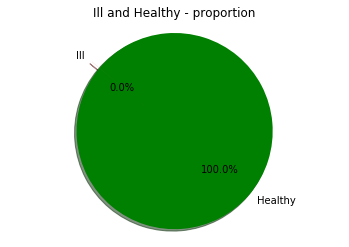

In [166]:
labels = 'Ill', 'Healthy'
sizes = [Collation["Confirmed"].dropna().sum(), Collation["Population"].dropna().sum() - Collation["Confirmed"].dropna().sum()]
colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Ill and Healthy - proportion")
plt.show()

In [167]:
#średni odsetek chorych w krajach
meanConfirmedCountry = Collation["Percentage of confirmed cases in population"].dropna().mean()
meanConfirmedCountry

0.0002352198441451244

In [168]:
#odsetek zmarłych w całej populacji
overallDeathsPercentage = Collation["Deaths"].dropna().sum() / Collation["Population"].dropna().sum()
overallDeathsPercentage

4.607687502973426e-06

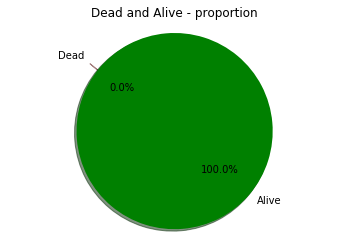

In [169]:
labels = 'Dead', 'Alive'
sizes = [Collation["Deaths"].dropna().sum(), Collation["Population"].dropna().sum() - Collation["Deaths"].dropna().sum()]
colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Dead and Alive - proportion")
plt.show()

In [170]:
#średni odsetek zmarłych w krajach
meanDeathsCountry = Collation["Percentage of deaths in population"].dropna().mean()
meanDeathsCountry

8.233558892374943e-06

In [171]:
#odsetek ozdrowiałych w całej populacji
overallRecoveriesPercentage = Collation["Recovered"].dropna().sum() / Collation["Population"].dropna().sum()
overallRecoveriesPercentage

2.0928821249735365e-05

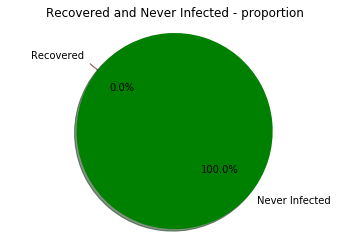

In [172]:
labels = 'Recovered', 'Never Infected'
sizes = [Collation["Recovered"].dropna().sum(), Collation["Population"].dropna().sum() - Collation["Deaths"].dropna().sum() - Collation["Recovered"].dropna().sum()]
colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Recovered and Never Infected - proportion")
plt.show()

In [173]:
#średni odsetek ozdrowiałych w krajach
meanRecoveriesCountry = Collation["Percentage of recoveries in population"].dropna().mean()
meanRecoveriesCountry

1.5218419765693888e-05

In [174]:
#dodawanie kolumn z odsetkami ozdrowiałych i zmarłych względem całej populacji kraju
recoveryRateByCountry = Collation.Recovered / Collation.Confirmed
Collation.insert(4, "Recovery rate", recoveryRateByCountry, True)

deathRateByCountry = Collation.Deaths / Collation.Confirmed
Collation.insert(7, "Death rate", deathRateByCountry, True)


In [175]:
Collation

,Confirmed,Percentage of confirmed cases in population,Recovered,Percentage of recoveries in population,Recovery rate,Deaths,Percentage of deaths in population,Death rate,Population,Density,GDP,GDP per capita,Median Age
Country,,,,,,,,,,,,,
Afghanistan,110.0,3.377928e-06,2.0,6.141687e-08,0.018182,4.0,1.228337e-07,0.036364,32564342.0,49.927697,1.946902e+10,597.863215,18.600000
Albania,197.0,6.503200e-05,31.0,1.023346e-05,0.157360,10.0,3.301117e-06,0.050761,3029278.0,105.373522,1.186387e+10,3916.400534,38.000000
Algeria,454.0,1.148141e-05,31.0,7.839732e-07,0.068282,29.0,7.333943e-07,0.063877,39542166.0,16.602211,1.590491e+11,4022.265668,29.100000
Andorra,308.0,3.598972e-03,1.0,1.168497e-05,0.003247,3.0,3.505492e-05,0.009740,85580.0,182.863248,2.858518e+09,33401.702490,NaN
Angola,5.0,2.547725e-07,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,19625353.0,15.741841,9.533511e+10,4857.752711,16.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,119.0,4.064838e-06,39.0,1.332174e-06,0.327731,2.0,6.831660e-08,0.016807,29275460.0,32.098525,NaN,NaN,29.000000
Vietnam,174.0,1.844220e-06,21.0,2.225783e-07,0.120690,0.0,0.000000e+00,0.000000,94348835.0,284.861070,2.052762e+11,2175.714964,32.599998
West Bank and Gaza,98.0,NaN,18.0,NaN,0.183673,1.0,NaN,0.010204,NaN,NaN,1.339710e+10,NaN,NaN


In [176]:
#śmiertelność wirusa w całej populcji
deathRate = Collation["Deaths"].dropna().sum() / Collation["Confirmed"].dropna().sum()
deathRate

0.04669454917344649

In [177]:
#odsetek ozdrowień w całej populacji
recoveryRate = Collation["Recovered"].dropna().sum() / Collation["Confirmed"].dropna().sum()
recoveryRate

0.2120937829133149

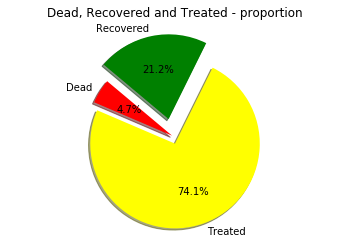

In [251]:
labels = 'Dead', 'Treated', 'Recovered'
sizes = [Collation["Deaths"].dropna().sum(), Collation["Confirmed"].dropna().sum() - Collation["Deaths"].dropna().sum() - Collation["Recovered"].dropna().sum() , Collation["Recovered"].dropna().sum()]
colors = ['red', 'yellow', 'green']
explode = (0, 0.1, 0.2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Dead, Recovered and Treated - proportion")
plt.show()

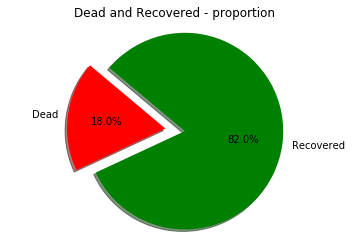

In [252]:
labels = 'Dead', 'Recovered'
sizes = [Collation["Deaths"].dropna().sum(), Collation["Recovered"].dropna().sum()]
colors = ['red', 'green']
explode = (0,0.2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Dead and Recovered - proportion")
plt.show()

In [179]:
#kraj z największą ilością zachorowań i wartość
c = str(Collation.Confirmed.idxmax())
n = str(Collation.Confirmed[c])
print(c + ": " + n)

US: 121478.0


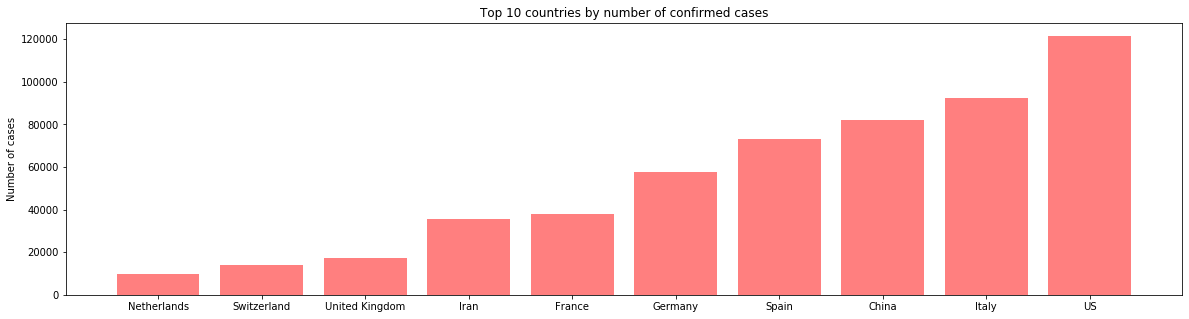

In [180]:
top10Confirmed = Collation["Confirmed"].sort_values(ascending = False).head(10)

objects = top10Confirmed.sort_values().index
y_pos = np.arange(len(objects))
performance = top10Confirmed.sort_values().values

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "red")
plt.xticks(y_pos, objects)
plt.ylabel('Number of cases')
plt.title('Top 10 countries by number of confirmed cases')

plt.show()

In [181]:
#kraj z największym odsetkiem zachorowań względem całej populacji i wartość
c = str(Collation["Percentage of confirmed cases in population"].idxmax())
n = str(Collation["Percentage of confirmed cases in population"][c])
print(c + ": " + n)

San Marino: 0.006783767413688673


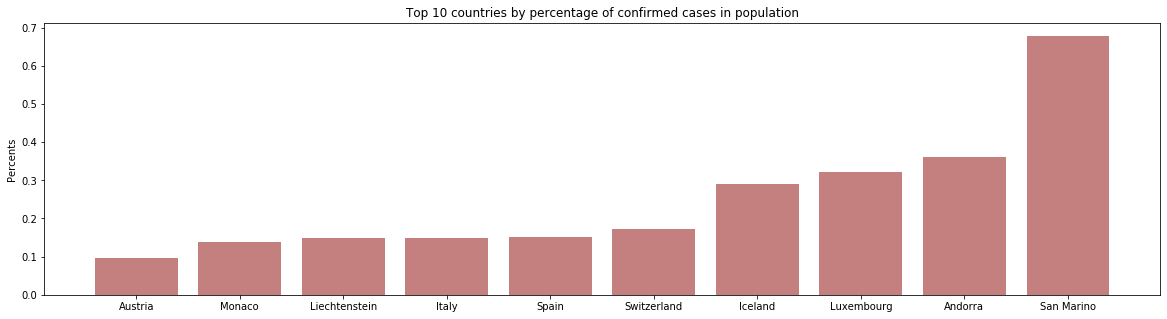

In [182]:
top10ConfirmedPercentage = Collation["Percentage of confirmed cases in population"].sort_values(ascending = False).head(10)

objects = top10ConfirmedPercentage.sort_values().index
y_pos = np.arange(len(objects))
performance = top10ConfirmedPercentage.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "darkred")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title('Top 10 countries by percentage of confirmed cases in population')

plt.show()

In [183]:
#kraj z największą ilością śmierci i wartość
c = str(Collation.Deaths.idxmax())
n = str(Collation.Confirmed[c])
print(c + ": " + n)

Italy: 92472.0


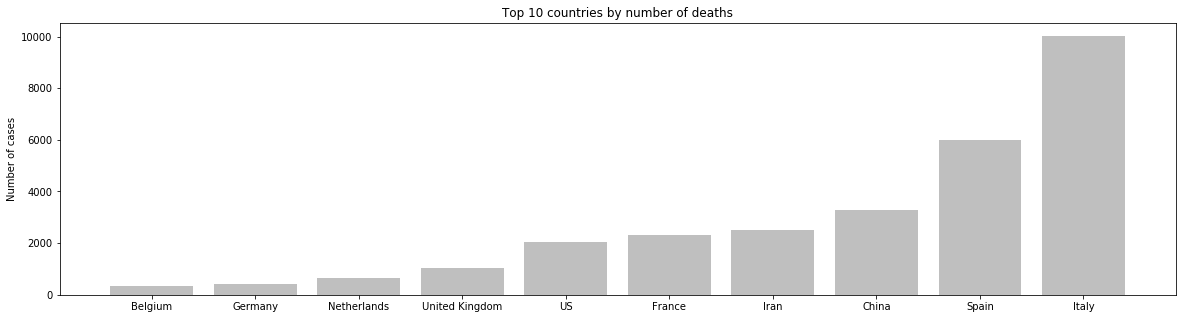

In [253]:
top10Deaths = Collation["Deaths"].sort_values(ascending = False).head(10)

objects = top10Deaths.sort_values().index
y_pos = np.arange(len(objects))
performance = top10Deaths.sort_values().values

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "gray")
plt.xticks(y_pos, objects)
plt.ylabel('Number of cases')
plt.title("Top 10 countries by number of deaths")

plt.show()

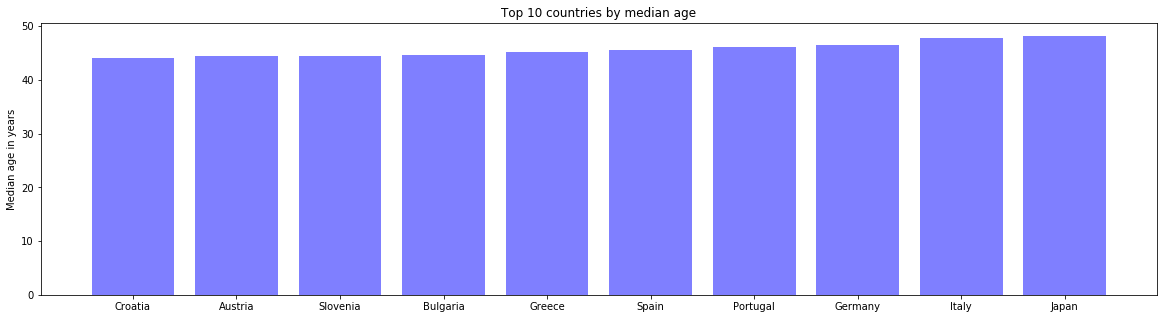

In [255]:
top10Age = Collation["Median Age"].sort_values(ascending = False).head(10)

objects = top10Age.sort_values().index
y_pos = np.arange(len(objects))
performance = top10Age.sort_values().values

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "blue")
plt.xticks(y_pos, objects)
plt.ylabel('Median age in years')
plt.title("Top 10 countries by median age")

plt.show()

In [185]:
#kraj z największym odsetkiem zmarłych względem całej populacji i wartość
c = str(Collation["Percentage of deaths in population"].idxmax())
n = str(Collation["Percentage of deaths in population"][c])
print(c + ": " + n)

San Marino: 0.0006662628709872804


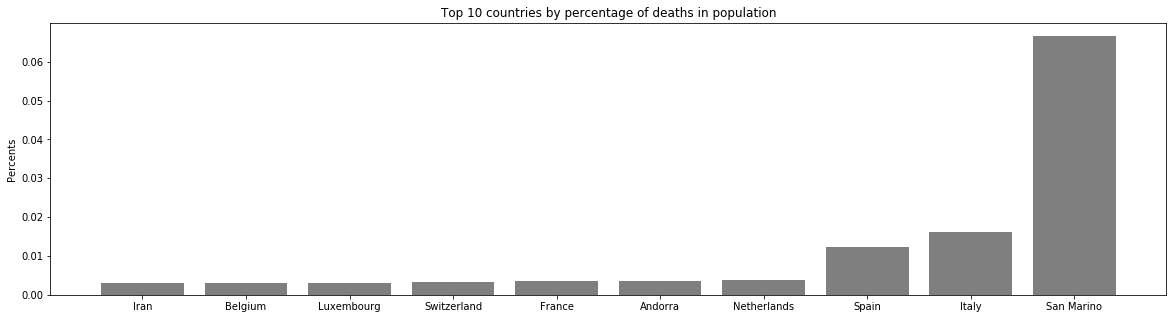

In [256]:
top10DeathsPercentage = Collation["Percentage of deaths in population"].sort_values(ascending = False).head(10)

objects = top10DeathsPercentage.sort_values().index
y_pos = np.arange(len(objects))
performance = top10DeathsPercentage.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "black")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title("Top 10 countries by percentage of deaths in population")

plt.show()

In [257]:
Collation["Percentage of deaths in population"]["Italy"]

0.0001620399410752093

In [187]:
#kraj z największym współczynnikiem śmiertelności i wartość
c = str(Collation["Death rate"].idxmax())
n = str(Collation["Death rate"][c])
print(c + ": " + n)

Gambia: 0.3333333333333333


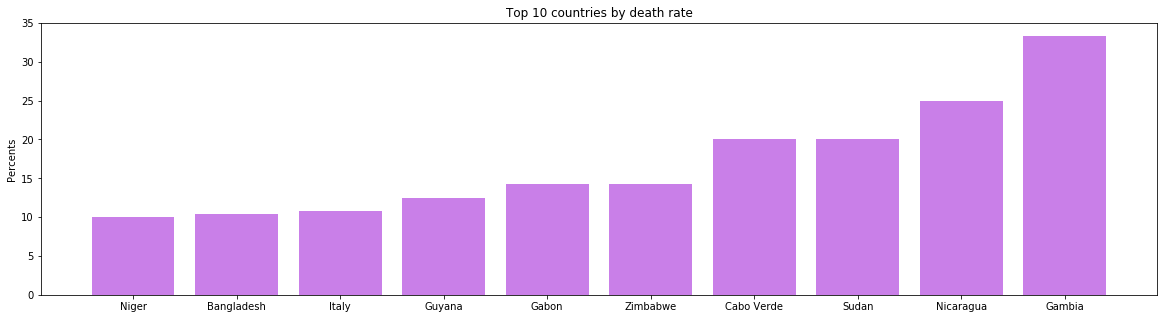

In [258]:
top10DeathRate = Collation["Death rate"].sort_values(ascending = False).head(10)

objects = top10DeathRate.sort_values().index
y_pos = np.arange(len(objects))
performance = top10DeathRate.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "darkviolet")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title("Top 10 countries by death rate")

plt.show()

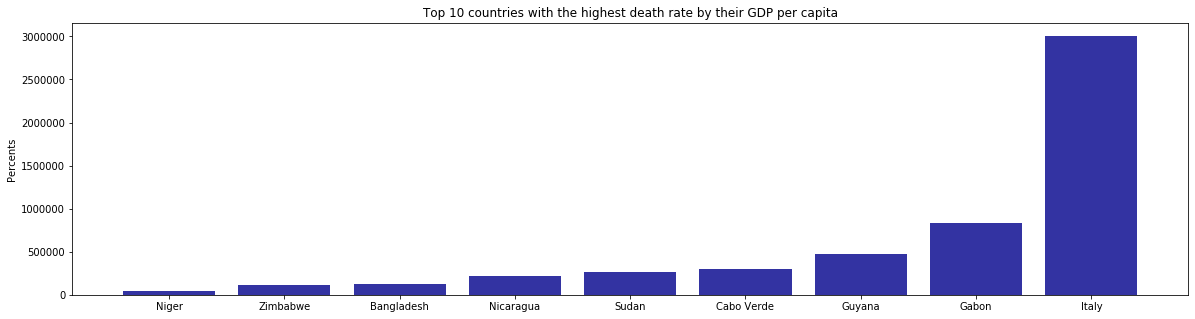

In [268]:
GDPTop10DeathRate = Collation["GDP per capita"][top10DeathRate.sort_values().index]

objects = GDPTop10DeathRate.dropna().sort_values().index
y_pos = np.arange(len(objects))
performance = GDPTop10DeathRate.dropna().sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.8, color = "darkblue")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title("Top 10 countries with the highest death rate by their GDP per capita")

plt.show()

In [189]:
#kraj z największą ilością ozdrowiałych i wartość
c = str(Collation.Recovered.idxmax())
n = str(Collation.Recovered[c])
print(c + ": " + n)

China: 75100.0


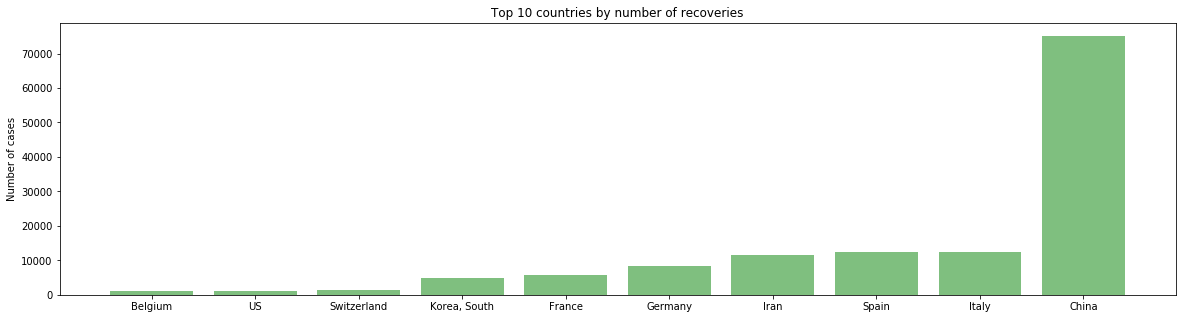

In [190]:
top10Recovered = Collation["Recovered"].sort_values(ascending = False).head(10)

objects = top10Recovered.sort_values().index
y_pos = np.arange(len(objects))
performance = top10Recovered.sort_values().values

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "green")
plt.xticks(y_pos, objects)
plt.ylabel('Number of cases')
plt.title("Top 10 countries by number of recoveries")

plt.show()

In [191]:
#kraj z największym odsetkiem ozdrowiałych względem całej populacji i wartość
c = str(Collation["Percentage of recoveries in population"].idxmax())
n = str(Collation["Percentage of recoveries in population"][c])
print(c + ": " + n)

Iceland: 0.00034345832404389034


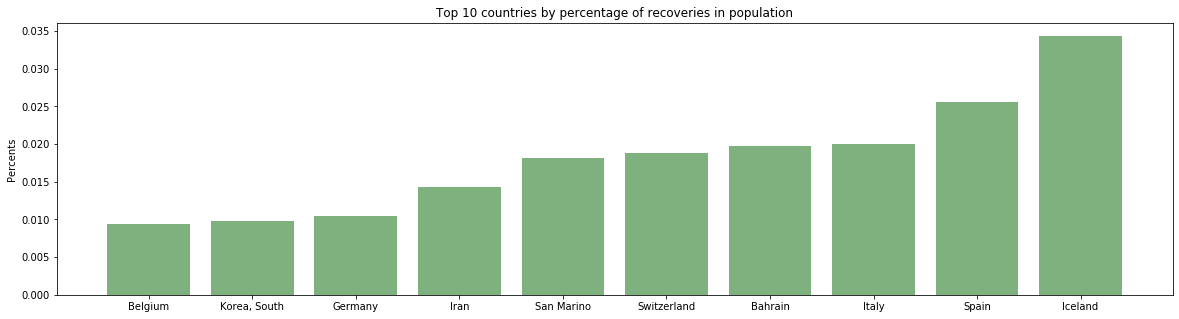

In [192]:
top10RecoveriesPercentage = Collation["Percentage of recoveries in population"].sort_values(ascending = False).head(10)

objects = top10RecoveriesPercentage.sort_values().index
y_pos = np.arange(len(objects))
performance = top10RecoveriesPercentage.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "darkgreen")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title('Top 10 countries by percentage of recoveries in population')

plt.show()

In [193]:
#kraj z największym współczynnikiem wyzdrowień i wartość
c = str(Collation["Recovery rate"].idxmax())
n = str(Collation["Recovery rate"][c])
print(c + ": " + n)

Saint Vincent and the Grenadines: 1.0


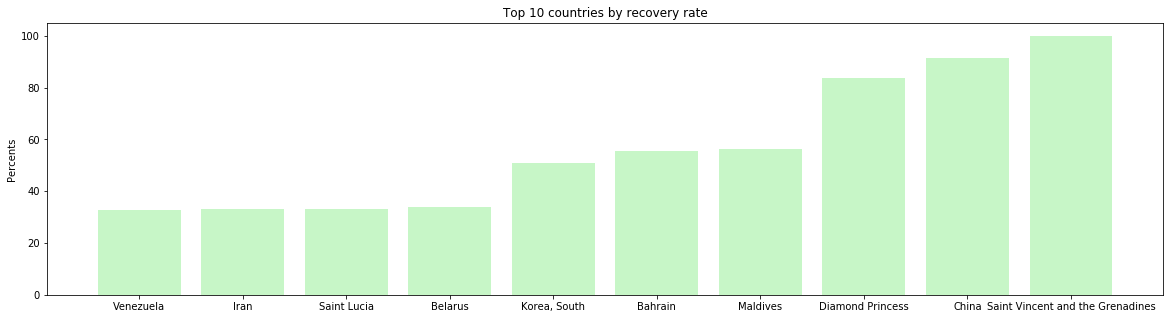

In [269]:
top10RecoveryRate = Collation["Recovery rate"].sort_values(ascending = False).head(10)

objects = top10RecoveryRate.sort_values().index
y_pos = np.arange(len(objects))
performance = top10RecoveryRate.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "lightgreen")
plt.xticks(y_pos, objects)
plt.ylabel('Percents')
plt.title('Top 10 countries by recovery rate')

plt.show()

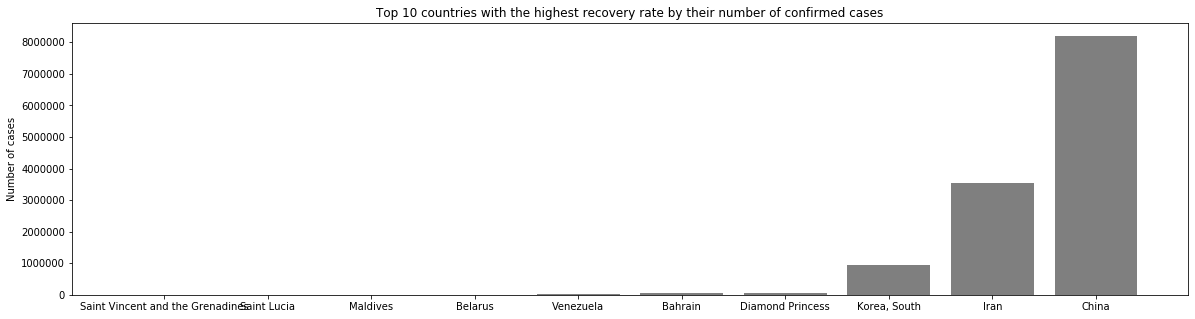

In [273]:
NumConfirmedTop10RecoveryRate = Collation["Confirmed"][top10RecoveryRate.sort_values().index]

objects = NumConfirmedTop10RecoveryRate.sort_values().index
y_pos = np.arange(len(objects))
performance = NumConfirmedTop10RecoveryRate.sort_values().values*100

plt.figure(figsize=(20,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "black")
plt.xticks(y_pos, objects)
plt.ylabel('Number of cases')
plt.title("Top 10 countries with the highest recovery rate by their number of confirmed cases")

plt.show()

In [195]:
Collation

,Confirmed,Percentage of confirmed cases in population,Recovered,Percentage of recoveries in population,Recovery rate,Deaths,Percentage of deaths in population,Death rate,Population,Density,GDP,GDP per capita,Median Age
Country,,,,,,,,,,,,,
Afghanistan,110.0,3.377928e-06,2.0,6.141687e-08,0.018182,4.0,1.228337e-07,0.036364,32564342.0,49.927697,1.946902e+10,597.863215,18.600000
Albania,197.0,6.503200e-05,31.0,1.023346e-05,0.157360,10.0,3.301117e-06,0.050761,3029278.0,105.373522,1.186387e+10,3916.400534,38.000000
Algeria,454.0,1.148141e-05,31.0,7.839732e-07,0.068282,29.0,7.333943e-07,0.063877,39542166.0,16.602211,1.590491e+11,4022.265668,29.100000
Andorra,308.0,3.598972e-03,1.0,1.168497e-05,0.003247,3.0,3.505492e-05,0.009740,85580.0,182.863248,2.858518e+09,33401.702490,NaN
Angola,5.0,2.547725e-07,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,19625353.0,15.741841,9.533511e+10,4857.752711,16.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,119.0,4.064838e-06,39.0,1.332174e-06,0.327731,2.0,6.831660e-08,0.016807,29275460.0,32.098525,NaN,NaN,29.000000
Vietnam,174.0,1.844220e-06,21.0,2.225783e-07,0.120690,0.0,0.000000e+00,0.000000,94348835.0,284.861070,2.052762e+11,2175.714964,32.599998
West Bank and Gaza,98.0,NaN,18.0,NaN,0.183673,1.0,NaN,0.010204,NaN,NaN,1.339710e+10,NaN,NaN


In [196]:
#szukanie zależności między seriami danych
#potwierdzone przypadki

In [197]:
#zależność między potwierdzonymi przypadkami a liczebnością populacji
Collation.cov()["Confirmed"]["Population"]

720738142043.4658

In [198]:
#siła tej zależności
Collation.corr(method = "pearson")["Confirmed"]["Population"]

0.38448137656485276

In [199]:
#zależność między potwierdzonymi przypadkami a gęstością zaludnienia
Collation.cov()["Confirmed"]["Density"]

-379712.07660269813

In [200]:
#siła tej zależności
Collation.corr(method = "pearson")["Confirmed"]["Density"]

-0.02208822968810013

In [201]:
#zależność między potwierdzonymi przypadkami a produktem krajowym brutto
Collation.cov()["Confirmed"]["GDP"]

9953126885758098.0

In [202]:
#siła tej zależności
Collation.corr(method = "pearson")["Confirmed"]["GDP"]

0.6744392211950768

In [203]:
#zależność między potwierdzonymi przypadkami a produktem krajowym brutto per capita
Collation.cov()["Confirmed"]["GDP per capita"]

52736988.530476935

In [204]:
#siła tej zależności
Collation.corr(method = "pearson")["Confirmed"]["GDP per capita"]

0.20636678971088984

In [205]:
#zależność między potwierdzonymi przypadkami a średnim wiekiem populacji
Collation.cov()["Confirmed"]["Median Age"]

37525.229390772176

In [206]:
#siła tej zależności
Collation.corr(method = "pearson")["Confirmed"]["Median Age"]

0.32204687712628627

In [207]:
#szukanie zależności między seriami danych
#ozdrowieńcy

In [208]:
#zależność między ozdrowieńcami a liczebnością populacji
Collation.cov()["Recovered"]["Population"]

623593164150.2538

In [209]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovered"]["Population"]

0.6869252933987576

In [210]:
#zależność między ozdrowieńcami a gęstością zaludnienia
Collation.cov()["Recovered"]["Density"]

-105052.55907018803

In [211]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovered"]["Density"]

-0.01261895802277924

In [212]:
#zależność między ozdrowieńcami a produktem krajowym brutto
Collation.cov()["Recovered"]["GDP"]

6197609022112235.0

In [213]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovered"]["GDP"]

0.8565184730694706

In [214]:
#zależność między ozdrowieńcami a produktem krajowym brutto per capita
Collation.cov()["Recovered"]["GDP per capita"]

2968533.8729936327

In [215]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovered"]["GDP per capita"]

0.02368792953085292

In [216]:
#zależność między ozdrowieńcami a średnim wiekiem populacji
Collation.cov()["Recovered"]["Median Age"]

8111.6080833566775

In [217]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovered"]["Median Age"]

0.14366991590981698

In [218]:
#szukanie zależności między seriami danych
#zgony

In [219]:
#zależność między zgonami a liczebnością populacji
Collation.cov()["Deaths"]["Population"]

30041226307.693775

In [220]:
#siła tej zależności
Collation.corr(method = "pearson")["Deaths"]["Population"]

0.2070290204147343

In [221]:
#zależność między zgonami a gęstością zaludnienia
Collation.cov()["Deaths"]["Density"]

-23494.086993162982

In [222]:
#siła tej zależności
Collation.corr(method = "pearson")["Deaths"]["Density"]

-0.017655533290004338

In [223]:
#zależność między zgonami a produktem krajowym brutto
Collation.cov()["Deaths"]["GDP"]

459928576512621.2

In [224]:
#siła tej zależności
Collation.corr(method = "pearson")["Deaths"]["GDP"]

0.4006888233439884

In [225]:
#zależność między zgonami a produktem krajowym brutto per capita
Collation.cov()["Deaths"]["GDP per capita"]

2494132.1449823463

In [226]:
#siła tej zależności
Collation.corr(method = "pearson")["Deaths"]["GDP per capita"]

0.12546732234759167

In [227]:
#zależność między zgonami a średnim wiekiem populacji
Collation.cov()["Deaths"]["Median Age"]

2294.368217785248

In [228]:
#siła tej zależności
Collation.corr(method = "pearson")["Deaths"]["Median Age"]

0.25398666379922685

In [229]:
#szukanie zależności między seriami danych
#współczynnik śmiertelności

In [230]:
#zależność między współczynnikiem śmiertelności a liczebnością populacji
Collation.cov()["Death rate"]["Population"]

422678.4328597058

In [231]:
#siła tej zależności
Collation.corr(method = "pearson")["Death rate"]["Population"]

0.07257705778210549

In [232]:
#zależność między współczynnikiem śmiertelności a gęstością zaludnienia
Collation.cov()["Death rate"]["Density"]

-3.054522671652773

In [233]:
#siła tej zależności
Collation.corr(method = "pearson")["Death rate"]["Density"]

-0.05719279487219582

In [234]:
#zależność między współczynnikiem śmiertelności a produktem krajowym brutto
Collation.cov()["Death rate"]["GDP"]

3879469849.4187217

In [235]:
#siła tej zależności
Collation.corr(method = "pearson")["Death rate"]["GDP"]

0.08455009183681625

In [236]:
#zależność między współczynnikiem śmiertelności a produktem krajowym brutto per capita
Collation.cov()["Death rate"]["GDP per capita"]

-50.37351243912693

In [237]:
#siła tej zależności
Collation.corr(method = "pearson")["Death rate"]["GDP per capita"]

-0.06341285185794214

In [238]:
#zależność między współczynnikiem śmiertelności a średnim wiekiem społeczeństwa
Collation.cov()["Death rate"]["Median Age"]

-0.03809273274726647

In [239]:
#siła tej zależności
Collation.corr(method = "pearson")["Death rate"]["Median Age"]

-0.09490576657722423

In [240]:
#szukanie zależności między seriami danych
#współczynnik wyzdrowienia

In [241]:
#zależność między współczynnikiem wyzdrowienia a liczebnością populacji
Collation.cov()["Recovery rate"]["Population"]

7405895.126626816

In [242]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovery rate"]["Population"]

0.348318390567173

In [243]:
#zależność między współczynnikiem wyzdrowienia a gęstością zaludnienia
Collation.cov()["Recovery rate"]["Density"]

15.831463146816397

In [244]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovery rate"]["Density"]

0.0811948714973217

In [245]:
#zależność między współczynnikiem wyzdrowienia a produktem krajowym brutto
Collation.cov()["Recovery rate"]["GDP"]

75369009718.39848

In [246]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovery rate"]["GDP"]

0.5673540492285414

In [247]:
#zależność między współczynnikiem wyzdrowienia a produktem krajowym brutto per capita
Collation.cov()["Recovery rate"]["GDP per capita"]

176.23330491644018

In [248]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovery rate"]["GDP per capita"]

0.07686745334094944

In [249]:
#zależność między współczynnikiem wyzdrowienia a średnim wiekiem populacji
Collation.cov()["Recovery rate"]["Median Age"]

0.17920108687782346

In [275]:
#siła tej zależności
Collation.corr(method = "pearson")["Recovery rate"]["Median Age"]

0.14015948237610656